Code link:https://gist.github.com/tboggs/8778945
Blog: http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

Wrote plots to "dirichlet_plots.png".


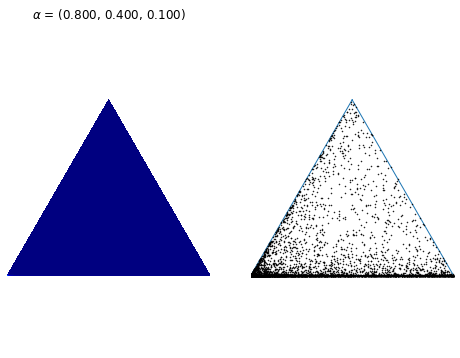

In [25]:
'''Functions for drawing contours of Dirichlet distributions.'''


from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_AREA = 0.5 * 1 * 0.75**0.5
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])

# For each corner of the triangle, the pair of other corners
_pairs = [_corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    coords = np.array([tri_area(xy, p) for p in _pairs]) / _AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                                for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments:
        `dist`: A distribution instance with a `pdf` method.
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        `subdiv` (int): Number of recursive mesh subdivisions to create.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.
    Arguments:
        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
        `barycentric` (bool): Indicates if `X` is in barycentric coords.
        `border` (bool): If True, the simplex border is drawn.
        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.triplot(_triangle, linewidth=1)

if __name__ == '__main__':
    f = plt.figure(figsize=(8, 6))
    alphas = [[0.8,.4,0.1]
              ]
    for (i, alpha) in enumerate(alphas):
        #plt.subplot( 2,len(alphas), i + 1)
        plt.subplot( 1,len(alphas)+1, i + 1)
        dist = Dirichlet(alpha)
        draw_pdf_contours(dist)
        title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
        plt.title(title, fontdict={'fontsize': 12})
        plt.subplot(1, len(alphas)+1, i + 1 + len(alphas))
       # plt.subplot(2, len(alphas), i + 1 + len(alphas))
        plot_points(dist.sample(5000))
    plt.savefig('dirichlet_plots.png')
    print('Wrote plots to "dirichlet_plots.png".')

## Uniform distribution, where all points on the simplex are equally probable

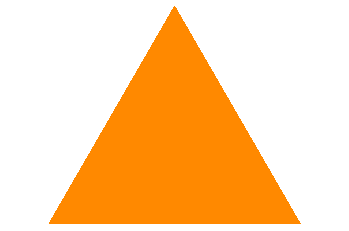

In [2]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

## For values of α<1, the distribution concentrates in the corners and along the boundaries of the simplex.

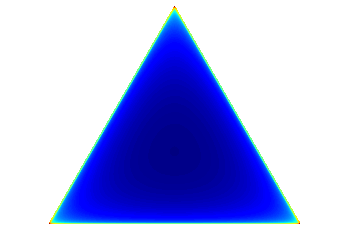

In [3]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

The color scale runs from dark blue (lowest values) to red (highest values). Notice in the plot above that only the corners of the simplex are red and intermediate values lie along the boundary of the simplex.

## For values of α>1, the distribution tends toward the center of the simplex.

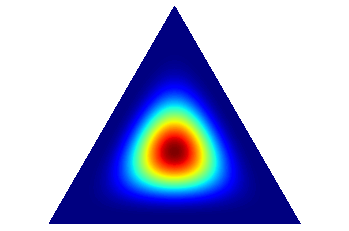

In [4]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

As α increases, the distribution becomes more tightly concentrated around the center of the simplex.

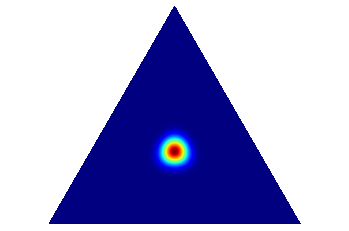

In [5]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

## Asymmetric (noncentral) Dirichlet distribution with a higher value for α

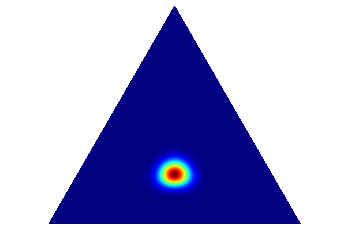

In [8]:
draw_pdf_contours(Dirichlet([50, 50, 30]))

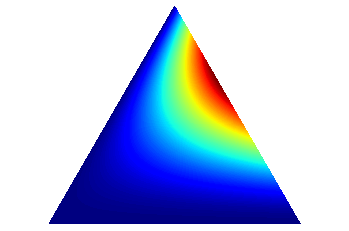

In [7]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

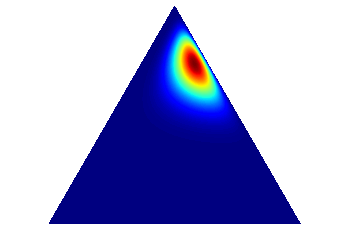

In [9]:
draw_pdf_contours(Dirichlet([2, 5, 15]))